In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [34]:
adult = pd.read_csv("../data/adult.csv", index_col=[0])
adult = adult.replace("?", pd.NA).dropna()
adult.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [20]:
adult["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [22]:
adult[adult["sex"] == "Male"]["age"].mean()

np.float64(39.43354749885268)

# Task 3
Get the percentage of people from Poland (native-country)

In [33]:
total = len(adult)
polands = len(adult[adult["native-country"] == "Poland"])
percentage = (polands / total) * 100
percentage

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [41]:
abow = adult[adult["salary"] == ">50K"]
below = adult[adult["salary"] == "<=50K"]

mean_abow = abow["age"].mean()
std_abow = abow["age"].std()

mean_below_or_equal = below["age"].mean()
std_below_or_equal = below["age"].std()

np.float64(13.464631257161633)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [43]:
adult["education"].unique()
higher = ["Bachelors", "Masters", "Doctorate"]
above = adult[adult["salary"] == ">50K"]
without_higher = abow[~abow["education"].isin(higher)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
52,47,Private,Prof-school,Married-civ-spouse,Prof-specialty,Wife,White,Female,60,Honduras,>50K,254
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K,122
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [58]:
res = adult.groupby("education")["age"].describe()
res

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [70]:
men = adult[adult["sex"] == "Male"]
married = men[men["marital-status"].str.startswith("Married")]
non_married = men[~men["marital-status"].str.startswith("Married")]

married["salary K$"].mean(), non_married["salary K$"].mean()

(np.float64(107.49455968688845), np.float64(46.59723865877712))

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [69]:
maximal = adult["hours-per-week"].max()
count = adult[adult["hours-per-week"] == maximal].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

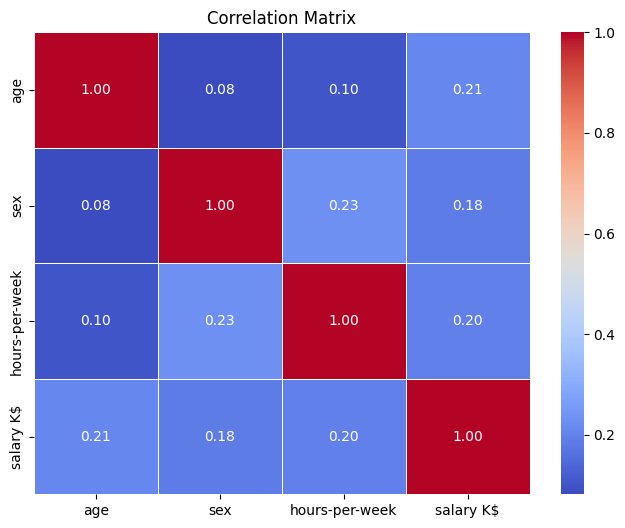

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

adult["sex"] = adult["sex"].map({"Male": 1, "Female": 0})
columns_of_interest = ["age", "sex", "hours-per-week", "salary K$"]

df_subset = adult[columns_of_interest]

correlation_matrix = df_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()